# Geospatial Analysis

This notebook works through some geospatial analysis concepts using GeoPandas.

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2

con = psycopg2.connect(database="dsa_ro", user="dsa_ro_user",password="readonly",host="dbase")

sql= "select name, lon, lat, pop2005, the_geom from geospatial.country_borders"

countries=gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )


In [2]:
countries.describe()

,lon,lat,pop2005
count,246.000000,246.000000,2.460000e+02
mean,13.284126,16.428919,2.462038e+07
std,74.646539,27.049485,1.144314e+08
min,-178.131000,-80.446000,0.000000e+00
25%,-50.164500,-0.302500,1.275082e+05
50%,17.665000,16.511000,3.085696e+06
75%,50.010250,39.106750,1.240175e+07
max,179.219000,78.830000,1.312979e+09


## Plotting 

We can produce a geospatial (map) plot of the data.

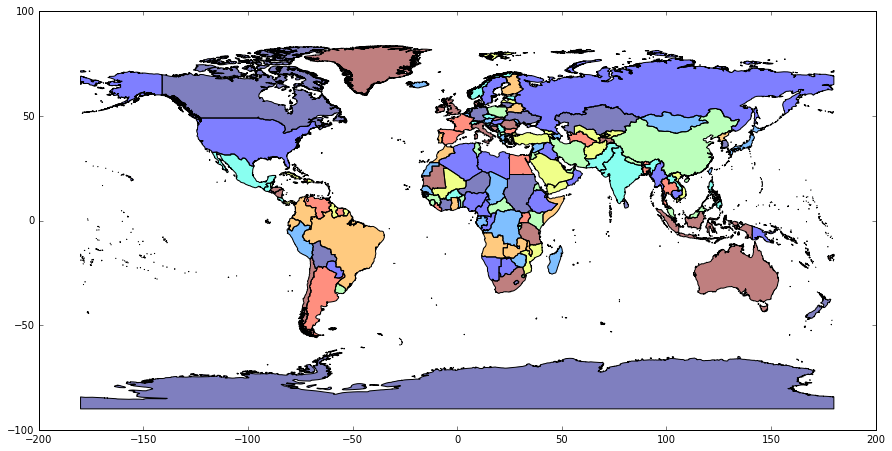

In [3]:
# plotting stuff
%matplotlib inline
countries.plot(figsize=(15,15))

Additionally, we can overlay additional inforamtion.

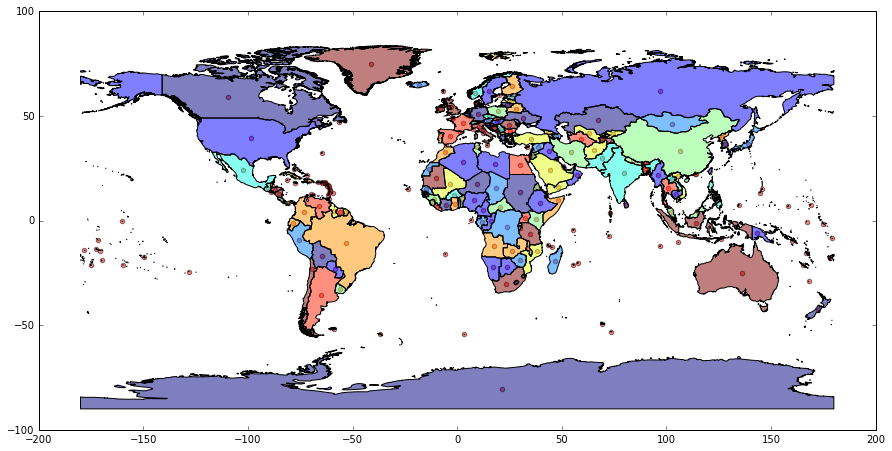

In [4]:
countries.plot(figsize=(15,15))
plt.scatter(x=countries['lon'], y=countries['lat'], alpha=0.5, c='r')

Read more about mapping data with GeoPandas here: http://geopandas.org/mapping.html

## Plotting with Aggregation

Let's look at plotting the 1st, 2nd, and 3rd order divisions for a country.
We will limit our view to Finland, which happens to only have fourth-order administrative boundaries in the table.

In [5]:
# First order
sql = "SELECT iso,name_1, name_2, name_3, name_4,the_geom "
sql+= " FROM geospatial.gadm_admin_borders "
sql+= " WHERE name_1 IS NOT NULL AND  name_2 IS NULL "
sql+= "  AND  name_3 IS NULL AND  name_4 IS NULL "
sql+= " AND iso IN ('FIN')"

firstOrders = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
firstOrders.describe()

,iso,name_1,name_2,name_3,name_4,the_geom
count,0,0,0,0,0,0
unique,0,0,0,0,0,0


In [6]:
# Fourth order
sql = "SELECT iso,name_1, name_2, name_3, name_4,the_geom "
sql+= " FROM geospatial.gadm_admin_borders "
sql+= " WHERE name_1 IS NOT NULL AND  name_2 IS NOT NULL "
sql+= "  AND  name_3 IS NOT NULL AND  name_4 IS NOT NULL "
sql+= " AND iso IN ('FIN')"

fourthOrders = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
len(fourthOrders)

438

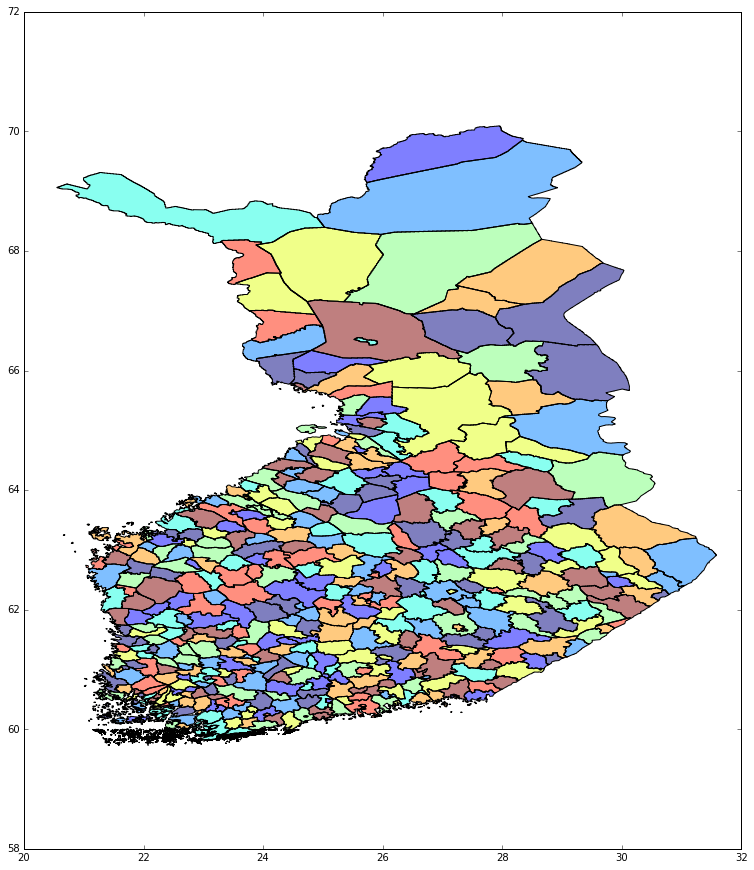

In [7]:
# Fourth order
sql = "SELECT iso,name_1, name_2, name_3, name_4,the_geom "
sql+= " FROM geospatial.gadm_admin_borders "
sql+= " WHERE name_1 IS NOT NULL AND  name_2 IS NOT NULL "
sql+= "  AND  name_3 IS NOT NULL AND  name_4 IS NOT NULL "
sql+= " AND iso IN ('FIN')"

fourthOrders = gpd.GeoDataFrame.from_postgis(sql,con,geom_col='the_geom' )
fourthOrders.plot(figsize=(15,15))

How to generate a map of third-order?  Second-order?  First-order?

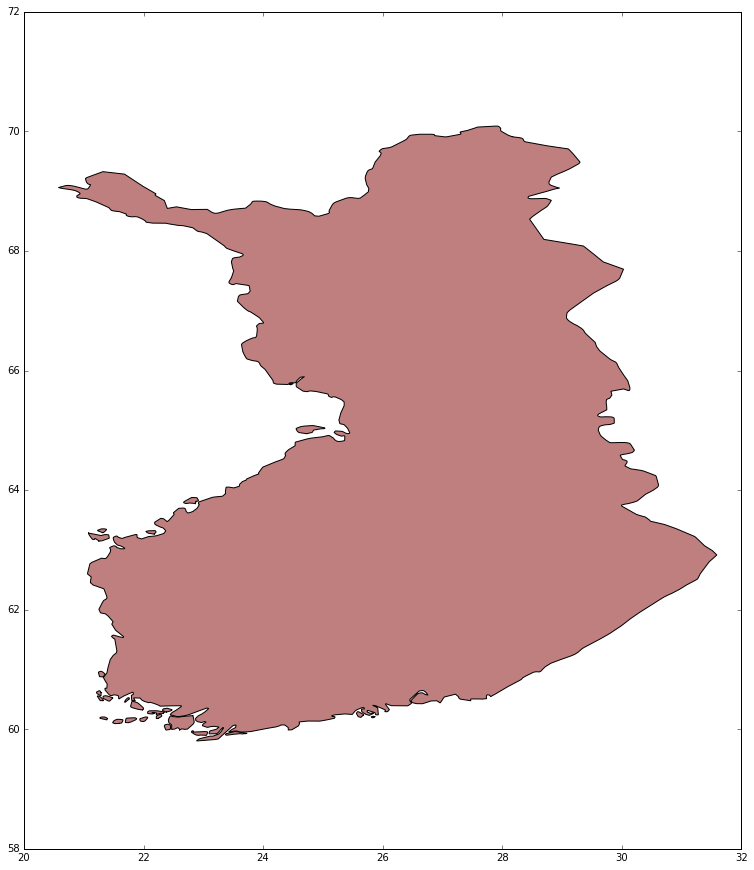

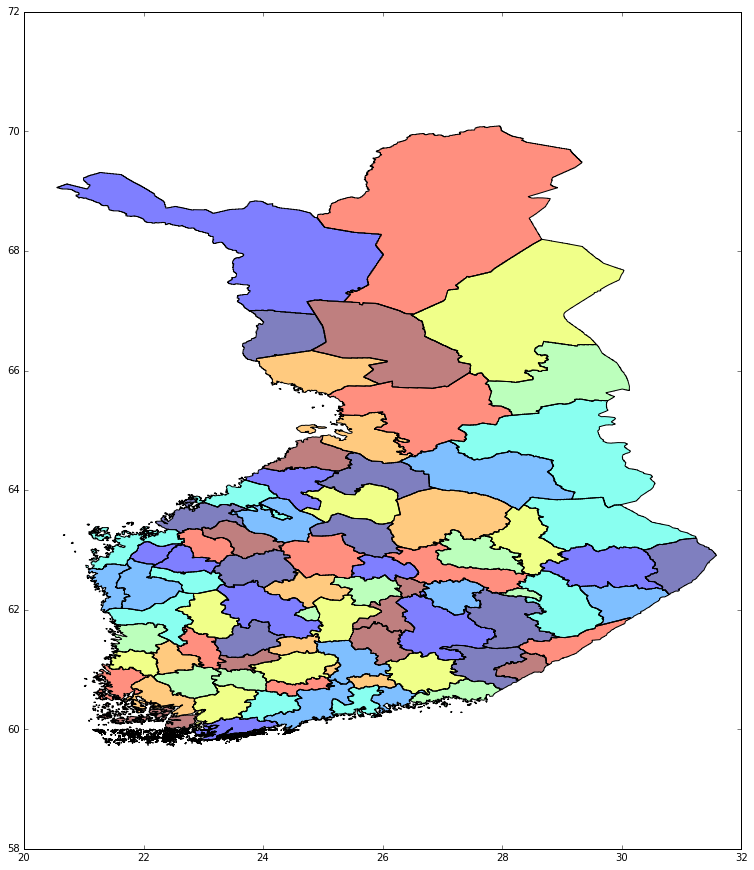

In [8]:
finland = countries.loc[countries['name'].isin(['Finland'])]

base = finland.plot(figsize=(15,15))

agg = fourthOrders.dissolve(by=['name_1','name_2','name_3'])
agg.plot(figsize=(15,15));


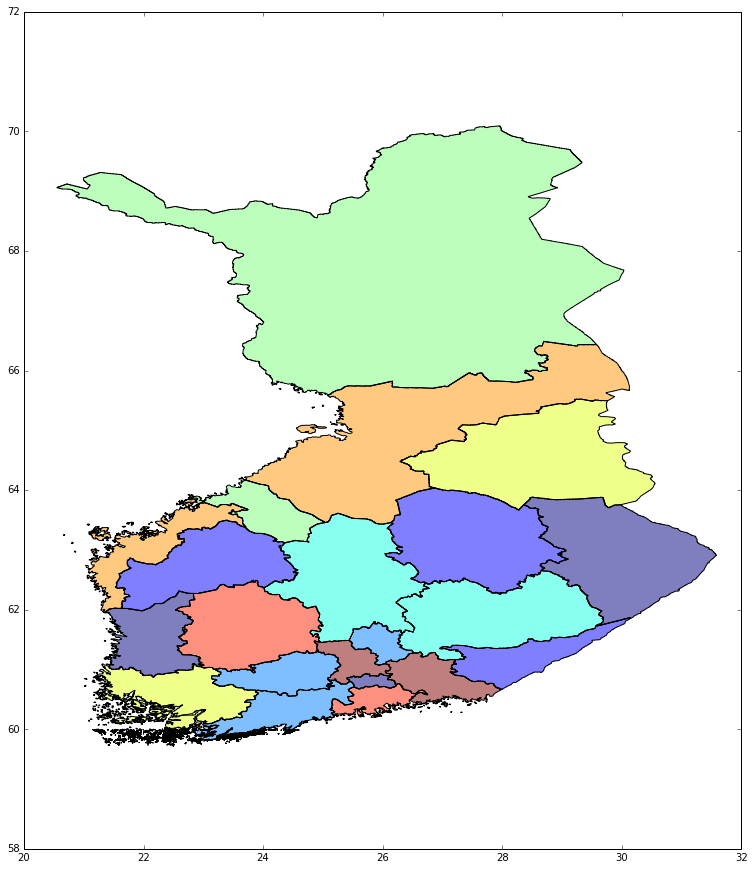

In [9]:
# Second-Order
agg = fourthOrders.dissolve(by=['name_1','name_2'])
agg.plot(figsize=(15,15));


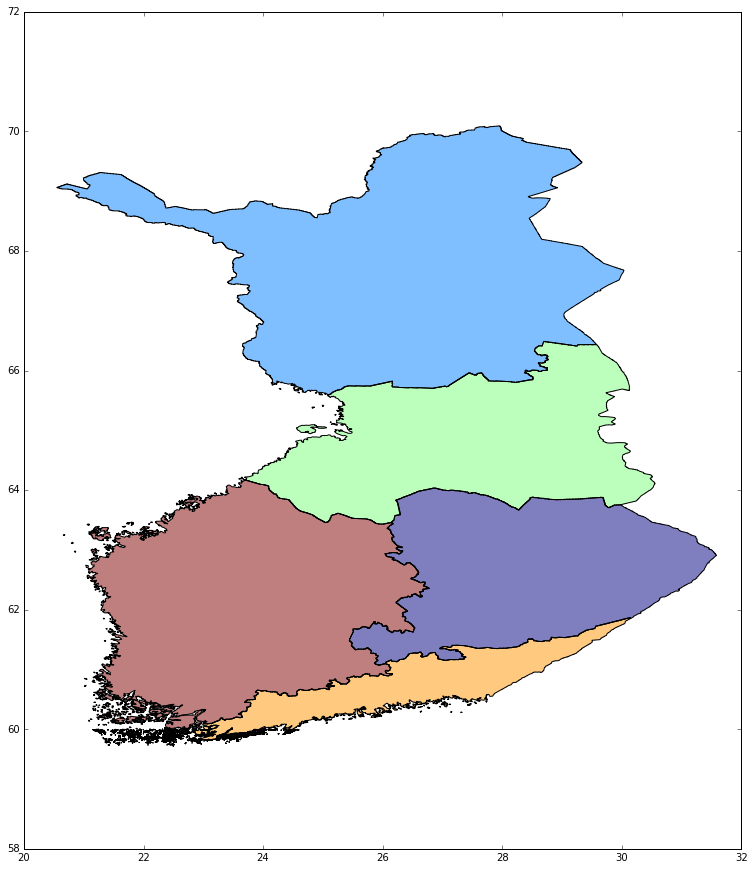

In [10]:
# First-Order
agg = fourthOrders.dissolve(by=['name_1'])
agg.plot(figsize=(15,15));

